## Data splitting

### Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

sns.set_theme()

In [2]:
df = pd.read_csv('data/all/music_data.csv')
df_meta = pd.read_csv('data/all/metadata.csv', parse_dates=['album_date_released'])

# Targets come from metadata
df = df.drop(columns=['track_id'])
df['popularity'] = df_meta['track_listens']
df['release'] = df_meta['album_date_released']

df

,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,chroma_cens_kurtosis_10,...,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01,popularity,release
0,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,...,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448,1293,2009-01-05
1,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,0.619185,...,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330,514,2009-01-05
2,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,...,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861,1151,2009-01-05
3,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,...,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800,50135,2008-02-06
4,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,-0.804761,...,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993,361,2009-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,-0.490129,0.463834,2.321970,-0.084352,1.662914,2.115189,-0.237794,5.695442,0.830353,1.951819,...,0.019816,4.448255,0.172852,0.028773,0.028320,0.003906,0.955388,0.012385,102,2017-02-17
106570,-0.461559,-0.229601,-0.496632,-0.422033,0.130612,-0.263825,-0.628103,-0.082687,-0.229483,-0.492753,...,0.026527,3.270612,0.196289,0.031116,0.027832,0.002441,1.283060,0.019059,165,2017-02-17
106571,0.552473,-0.110498,-0.532014,0.263131,-0.224011,-0.530972,1.713526,1.418444,1.325197,0.120333,...,0.020471,2.356727,0.212891,0.038450,0.037109,0.003418,0.828569,0.017904,168,2017-02-17
106572,-0.176901,0.187208,-0.050664,0.368843,0.066005,-0.857354,-0.780860,0.626281,-0.630938,-0.787229,...,0.017936,6.188604,0.167480,0.041480,0.038086,0.004883,1.818740,0.020133,294,2017-02-17


### Test set

In [3]:
idx = df.sample(n=10000, replace=False, random_state=1).index
df_test = df.iloc[idx].reset_index(drop=True)
df = df.drop(index=idx).reset_index(drop=True)
print(f'df test: {df_test.shape[0]} rows, {df_test.shape[1]} columns')
print(f'df: {df.shape[0]} rows, {df.shape[1]} columns')
df_test.to_csv('data/test.csv', index=False)

df test: 10000 rows, 520 columns
df: 96574 rows, 520 columns


### Train set

In [4]:
def plt_curve(title, train_sizes, train_scores, test_scores, fit_times):
    """
    Code based on scikit learn example: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
    """
    # Values
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Init fig
    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

    # Plot learning curve
    axes[0].set_title(f'Learning curve (R2): {title}')
    axes[0].set_xlabel("Training examples")
    # axes[0].set_ylabel("Score")
    axes[0].set_yticklabels([])
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes[0].plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    axes[0].legend(loc="best")
    
    # Plot n_samples vs fit_times
    axes[1].set_title("Scalability of the model")
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
    
    # Plot fit_time vs score
    axes[2].set_title("Performance of the model")
    axes[2].set_xlabel("fit_times")
    # axes[2].set_ylabel("Score")
    axes[2].set_yticklabels([])
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(fit_time_sorted, test_scores_mean_sorted - test_scores_std_sorted, test_scores_mean_sorted + test_scores_std_sorted, alpha=0.1)

    # Show fig
    axes[0].grid()
    axes[1].grid()
    axes[2].grid()
    plt.show()

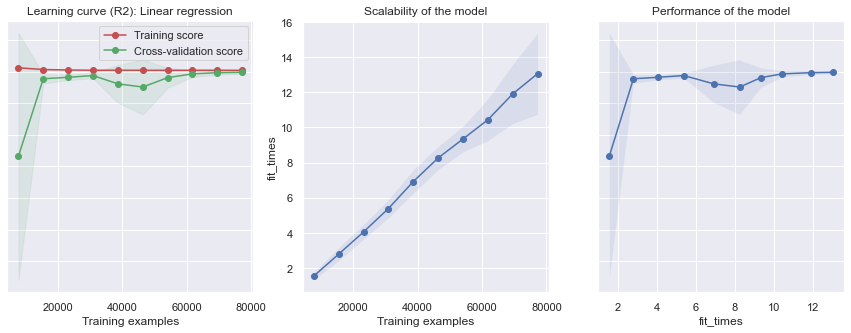

In [5]:
# m1

X = df.drop(columns=['popularity', 'release'])
y = df['popularity']

title = "Linear regression"
estimator = LinearRegression()
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=train_sizes, return_times=True)

plt_curve(title, train_sizes, train_scores, test_scores, fit_times)

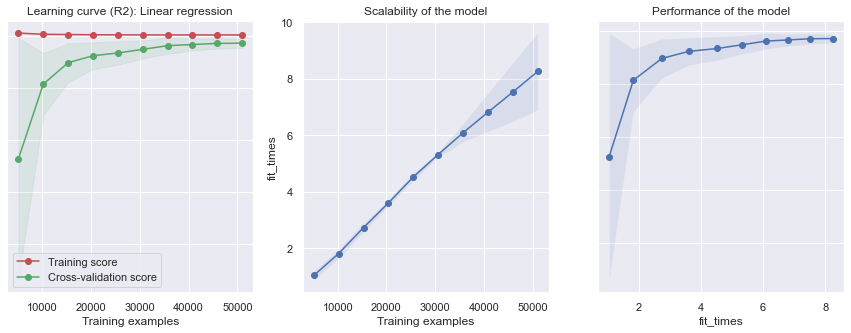

In [6]:
# m2

df_m2 = df.dropna(subset=['release'])
X = df_m2.drop(columns=['popularity', 'release'])
y = df_m2['release'].dt.year.astype(int)

title = "Linear regression"
estimator = LinearRegression()
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=train_sizes, return_times=True)

plt_curve(title, train_sizes, train_scores, test_scores, fit_times)

#### Train set: reductions (15,000)

In [7]:
idx = df.sample(n=15000, replace=False, random_state=1).index
df_red = df.iloc[idx].reset_index(drop=True)
df = df.drop(index=idx).reset_index(drop=True)
print(f'df red: {df_red.shape[0]} rows, {df_red.shape[1]} columns')
print(f'df: {df.shape[0]} rows, {df.shape[1]} columns')
df_red.to_csv('data/red.csv', index=False)

df red: 15000 rows, 520 columns
df: 81574 rows, 520 columns


#### Train set: regressions (15,000)

In [8]:
idx = df.sample(n=15000, replace=False, random_state=1).index
df_reg = df.iloc[idx].reset_index(drop=True)
df = df.drop(index=idx).reset_index(drop=True)
print(f'df reg: {df_reg.shape[0]} rows, {df_reg.shape[1]} columns')
print(f'df: {df.shape[0]} rows, {df.shape[1]} columns')
df_reg.to_csv('data/reg.csv', index=False)

df reg: 15000 rows, 520 columns
df: 66574 rows, 520 columns


#### Train set: hyperparameter optimization (15,000)

In [9]:
idx = df.sample(n=15000, replace=False, random_state=1).index
df_hyper = df.iloc[idx].reset_index(drop=True)
df = df.drop(index=idx).reset_index(drop=True)
print(f'df hyper: {df_hyper.shape[0]} rows, {df_hyper.shape[1]} columns')
print(f'df: {df.shape[0]} rows, {df.shape[1]} columns')
df_hyper.to_csv('data/hyper.csv', index=False)

df hyper: 15000 rows, 520 columns
df: 51574 rows, 520 columns
